<a href="https://colab.research.google.com/github/jgreg4/ML_Projects_ImageClassify/blob/main/ML_Problems_ImageClassification_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
__Dataset Tutorial__

by J. Griego

This tutorial describes the process to build your own mini dataset (2000 images) from the ground up. The image dataset here is composed of camera trap images of animals (deer, puma, elk, coyote, and bear).

* To build or borrow a dataset take the following steps:
---  
  * Build dataset from camera trap repositories (option 1 - best)
    * Description: full resolution images
    * Recommendation: find images or videos that are public domain
    * This tutorial: 5 animal classes of interest
    * Number of images: collect ~ 400 unique images for each class
    * Image Source 1: eMammal camera trap research project
      * link: https://emammal.si.edu/
      * search for class names and save images as *.jpg or similar
    * Video/Image Source 2: US Fish and Wildlife Service
      * link: https://www.fws.gov/search/videos?$keywords=%22deer%22
      * the above looks for videos of 'deer'- other types could be searched as well
      * ensure the videos or images you choose are public domain
    * Video/Image Source 3: US National Park Service
      * link: https://www.nps.gov/media/multimedia-search.htm#sort=Date_Last_Modified+desc
      * ensure the videos or images you choose are public domain
  * This tutorials dataset is located here for an example:
      * add link here
      * Dataset and Video size (so far): 1.5 GB
        * Google Drive has 15 GB capacity for free-tier
  * Image selection tips:
    * add here
  * Video frame selection tips:
    * When you choose video frames of you animal class, choose sections of the video where the animal is in motion
      * This will avoid feeding too many frames into your model that could potentially over-fit the model (won't generalize well to new input)
---        
  * Download from Caltech Camera Traps (option 2)
    * Full resolution images
    * Dataset size: ~ 105 GB
      * This is too large for a tutorial (just included for awareness)
    * https://lila.science/datasets/caltech-camera-traps
---
  * Download from ImageNet (option 3)
    * Images scaled to 64 x 64
    * Dataset size: ~ 12.5 GB (unscaled dataset is ~1.08 TB)
      * This is too large for a tutorial (just included for awareness)
    * link: https://image-net.org/download.php

---

__Setup Google Drive with selected dataset__

Now that data has been compiled, here is some example code to get the dataset ready for example image viewing.
* Login to your google account (create one if you haven't already)
  * https://workspace.google.com/products/drive/
* Click 'Sign in' button
* Click on 'My Drive'
* Right-click and select 'New folder'
  * Create a folder called 'Datasets'
    * Within 'Datasets' you should create two separate folders 'Images' and 'VideoExample'
* For my 'Images' folder I have these subfolders
  * \_0\_deer
  * \_1\_puma
  * \_2\_elk
  * \_3\_coyote
  * \_4\_bear
* For my 'VideoExample' folder I have these files
  * 'CalderaChats_MountainLions.mp4'
    * this is for an example later of how to extract video frames
    * Download the video from here: https://www.nps.gov/media/video/view.htm%3Fid%3DAE5A44C5-E0A7-4823-B4B0-53D69EA15853
  * 'GeneralVideoInfo.txt'
    * this just contains generic information about where the image was obtained, etc
---


In [3]:
# Install for video usage
!pip install av

# The following is to allow access to datasets that have been saved on google drive
from google.colab import drive
drive.mount('/content/drive')

# load necessary libraries for plotting etc
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import torchvision
import itertools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.5/39.5 MB 18.3 MB/s eta 0:00:00
Mounted at /content/drive


---
__A quick look at an example image__

* This section is a brief code example to display images of the puma dataset
  * this is the $380^{th}$ image of the puma dataset
# ---

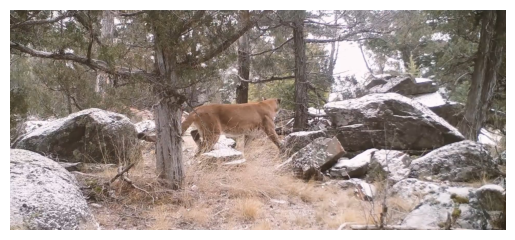

In [4]:
# Set path to image folder, this is just a simple image display
# There is a folder called 'Datasets' where images can be stored on the google drive
image_example_path = '/content/drive/My Drive/Datasets/Images/_1_puma/0380.jpg'
img = Image.open(image_example_path)

# Show the example image
plt.imshow(img)
plt.axis('off')
plt.show()

---
__A quick look at an example video frame sequence__

* This section is a code example to display video frame images from an example video
* Another code example will be shown later for how to extract and save video frames for building the image dataset.
  * This is a much quicker process than manually choosing single images from a public domain resource.
---

29.97002997002997


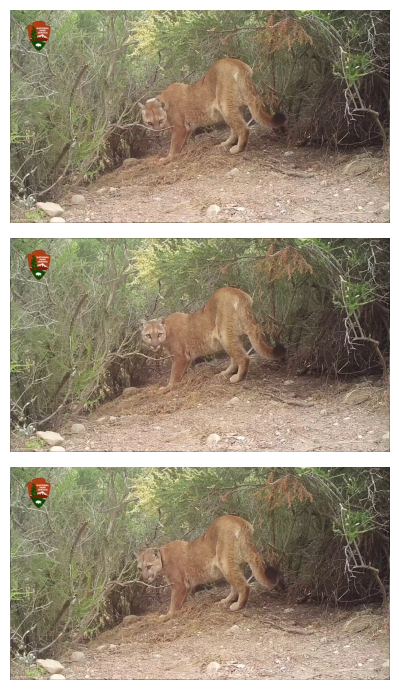

In [7]:
import matplotlib.pyplot as mpl
import numpy as np
import cv2

# This is where you set the filename for the video you want to extract frames from
video_path = '/content/drive/My Drive/Datasets/VideoExample/CalderaChats_MountainLions.mp4'
cap1 = cv2.VideoCapture(video_path)

# Extract the total number of video frames from the properties print(total_frames)
total_frames = int(cap1.get(cv2.CAP_PROP_FRAME_COUNT))

# grab fps info- for searching purposes within time stamps
vid_fps = cap1.get(cv2.CAP_PROP_FPS)
print(vid_fps)

# left is the time stamp, right is the frame number range
# mountain lion2 1:43 - 1:49 @ Frame # 3115 to 3200
# Loop through frames- set your start and finish range

# Frame number range
start = 3115
finish = 3200
num_images = 3 # number of images for plotting
step = np.ceil((finish - start)/num_images) #np.floor or np.ceil
step = int(step)

# for frame storing
frames = []

for frameNo in range(start, finish, step):
  cap1.set(cv2.CAP_PROP_POS_FRAMES, frameNo)
  ret, frame = cap1.read()

  # Need to convert BGR to RGB- OpenCV has BGR by default
  frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

  # Gather the frames that were stepped through
  frames.append(frame_rgb)

# Release captured video
cap1.release()

# Plot the captured frames vertically (3 row x col)
fig, axes = mpl.subplots(nrows=num_images, ncols=1, figsize=(5, 7))

# Plot each frame in a separate row
for idx, ax in enumerate(axes):
    ax.imshow(frames[idx])  # Display the frame
    ax.axis('off')  # Hide axes

# Adjust layout to make sure images fit well
mpl.tight_layout()
mpl.show()

---
__Add code here for video frame extraction__

* This is example code of how to extract and save video frames for building the image dataset.
  * This is a much quicker process than manually choosing single images from a public domain resource.
---

---
__Discussing Dataset Type__

* Describe what the inputs are. Is it 1D/2D/3D NumPy array?

* Describe what the output labels are: What are the categories?

* Describe how to extend the dataset. Show how to download and add an audio, image, or a plain video to the dataset.

* Explain how to setup the training, validation, and testing datasets.

---

---
__Model Description Tutorial__

Provide sufficient information to access all elements of the model:

* Load a model Give Python code of how to load a pretrained model. You may want to use wget from a GitHub account.
* Save a model Give Python code of how to save your model.
* Number of parameters You can give a command that prints how many.
* Input layer Demonstrate compatibility with the dataset tutorial.
* Output layer How many outputs? What are the activation functions? How do we train the model? What is the loss function? Do you use cross-entropy, mean squared error? What is it?
* Intermediate layers Is the model using CNNs? Is it LSTM? Is it ResNet? Give a brief description of intermediate layers. You can reuse images from the reference papers. If small, print the entire model. Else, describe major parts of the model.
---

---
__Model Optimization Tutorial__

Provide sufficient information to show how to fine- tune a model:

* Loss function Specify the loss function (as in the model description).
* Optimization algorithm Give the name. Is it Adams? Which one. Give basic parameters of the optimization algorithm.
* Learning rate Give initial learning rate. If you adjust it, explain how.
* Batch size Give the number of audio, images, or videos that are used in each batch.
* Number of epochs Provide the maximum number of epochs. Are you using early stopping?
---

---
__Basic Testing Tutorial__

* Load the pre-trained model using wget to download it and run it on one test example.
---

---
__Basic fine-tuning Tutorial__

* Download a pre-trained model, setup the optimization loop, and show that the loss function is getting reduced. Retrain the pre-trained model for a few iterations to demonstrate the optimization process.
---

---
__Full training Tutorial__

* Run the loop multiple times and show that the validation and testing losses converge to a good number. If the losses do not converge, you will need to add data augmentation.
---

---
__Help Links__

* PyTorch
  * https://pytorch.org/tutorials/
* Scikit-Learn Examples
  * https://scikit-learn.org/stable/auto_examples/index.html
* Ultralytics YOLO Docs
  * https://docs.ultralytics.com/
---